In [49]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_columns=None
pd.options.mode.chained_assignment = None

In [50]:
asp = pd.read_excel(r'C:\Users\User\asp\new_shit.xls')

In [51]:
asp_info = pd.read_excel(r'C:\Users\User\asp\Выгрузка 1.xls',parse_dates=['Дата рождения'])

In [52]:
asp_info.head()

,№п/п,ФИО,Дата рождения,Пол,Номер ЛД,Структурное подразделение,Подразделение,Специальность/направление,Курс по порядку,Гражданство,Состояние,Учебное заведение при поступлении,Вид трудоустройства,Должность,Направление трудоустройства,Льгота/Особая отметка,Квота МОН,Дата начала действия,Дата окончания действия
0,1,Аббас Майтхам Худайр Аббас,11.05.1981,Мужской,2200674,NaN,Горный институт,Электротехнические комплексы и системы,3,Ирак,Аспирант,NaN,NaN,NaN,NaN,Направление Минобрнауки России,Да,20.08.2021,NaN
1,2,Абдукодиров Абдулла Абдумалик Угли,25.06.1996,Мужской,2100847,Институт новых материалов и нанотехнологий,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,Аспирант,NaN,NaN,NaN,NaN,NaN,Нет,NaN,NaN
2,3,Абдурашидов Шерзод Шухрат Угли,26.09.1994,Мужской,2210009,НИТУ МИСИС,Институт экотехнологий и инжиниринга,Обработка металлов давлением,3,Узбекистан,Аспирант,NaN,NaN,NaN,NaN,Средний балл диплома,Нет,30.06.2020,NaN
3,4,Абедалхуссайн Ахмед Али Абедалхуссайн,15.07.1982,Мужской,2416101,НИТУ МИСИС,Институт информационных технологий и компьютерных наук,"Системный анализ, управление и обработка информации, статистика",1,Ирак,Аспирант,NaN,NaN,NaN,NaN,NaN,Нет,NaN,NaN
4,5,Абрамов Николай Николаевич,22.05.1989,Мужской,2403405,НИТУ МИСИС,Институт новых материалов и нанотехнологий,Физика конденсированного состояния,1,Российская Федерация,Аспирант,NaN,NaN,NaN,NaN,NaN,Нет,NaN,NaN


In [53]:
asp_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   №п/п                               820 non-null    int64  
 1   ФИО                                820 non-null    object 
 2   Дата рождения                      820 non-null    object 
 3   Пол                                820 non-null    object 
 4   Номер ЛД                           820 non-null    int64  
 5   Структурное подразделение          658 non-null    object 
 6   Подразделение                      820 non-null    object 
 7   Специальность/направление          820 non-null    object 
 8   Курс по порядку                    820 non-null    int64  
 9   Гражданство                        820 non-null    object 
 10  Состояние                          820 non-null    object 
 11  Учебное заведение при поступлении  0 non-null      float64

In [54]:
asp_info=asp_info.rename(columns={'Номер ЛД':'ld_number','Специальность/направление':'faculty',
                        'Дисциплина':'subject','Оценка (успеваемость)':'marks','Подразделение':'institue','Курс по порядку':'course','Гражданство':'country','Дата рождения':'birthday'})

In [55]:
asp_info.columns

Index(['№п/п', 'ФИО', 'birthday', 'Пол', 'ld_number',
       'Структурное подразделение', 'institue', 'faculty', 'course', 'country',
       'Состояние', 'Учебное заведение при поступлении', 'Вид трудоустройства',
       'Должность', 'Направление трудоустройства', 'Льгота/Особая отметка',
       'Квота МОН', 'Дата начала действия', 'Дата окончания действия'],
      dtype='object')

In [56]:
asp_info = asp_info.drop(columns = ['№п/п','ФИО','Состояние','Учебное заведение при поступлении', 'Вид трудоустройства',
       'Должность', 'Направление трудоустройства', 'Льгота/Особая отметка',
       'Квота МОН', 'Дата начала действия', 'Дата окончания действия'])

In [57]:
asp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   №п/п                       12181 non-null  int64 
 1   ФИО                        12181 non-null  object
 2   Номер ЛД                   12181 non-null  int64 
 3   Подразделение              12181 non-null  object
 4   Специальность/направление  12181 non-null  object
 5   Специализация/профиль      11119 non-null  object
 6   Курс по порядку            12181 non-null  int64 
 7   Состояние                  12181 non-null  object
 8   Дисциплина                 12180 non-null  object
 9   Оценка (без пересдач)      5211 non-null   object
 10  Оценка (успеваемость)      5319 non-null   object
 11  Полугодие                  12180 non-null  object
 12  Преподаватель              5191 non-null   object
 13  Учебный год                12180 non-null  object
dtypes: int

In [58]:
asp['Подразделение'].value_counts()

Подразделение
Горный институт                                                                                   3136
Институт экотехнологий и инжиниринга                                                              3062
Институт новых материалов и нанотехнологий                                                        2699
Институт информационных технологий и компьютерных наук                                             894
ММТ факультет/Б                                                                                    770
Институт экономики и управления промышленными предприятиями имени Владимира Андреевича Роменца     443
Институт физики и квантовой инженерии                                                              437
АИТ факультет/Б                                                                                    293
ИЭ факультет/Б                                                                                     200
Институт биомедицинской инженерии                          

In [59]:
asp['Номер ЛД'].nunique()

816

In [60]:
years = ['2024 - 2025', '2025 - 2026', '2026 - 2027', '2027 - 2028']

In [61]:
asp_joke = asp[asp['Учебный год'].isin(years)] 

In [62]:
asp = asp[~ asp['Учебный год'].isin(years)] 

In [63]:
nuli = asp[asp['Оценка (успеваемость)'].isna()]

In [64]:
nuli['Учебный год'].unique()

array(['2022 - 2023', '2023 - 2024', '2020 - 2021', nan, '2021 - 2022',
       '2019 - 2020', '2017 - 2018', '2018 - 2019'], dtype=object)

In [65]:
nuli['Номер ЛД'].nunique()

160

In [66]:
nuli.head(3)

,№п/п,ФИО,Номер ЛД,Подразделение,Специальность/направление,Специализация/профиль,Курс по порядку,Состояние,Дисциплина,Оценка (без пересдач),Оценка (успеваемость),Полугодие,Преподаватель,Учебный год
169,170,Александров Егор Александрович,1900103,Горный институт,"Геотехнология, горные машины",Горные машины,3,Аспирант,Академическое письмо,NaN,NaN,II полугодие,NaN,2022 - 2023
170,171,Александров Егор Александрович,1900103,Горный институт,"Геотехнология, горные машины",Горные машины,3,Аспирант,Педагогическая практика,NaN,NaN,II полугодие,NaN,2022 - 2023
173,174,Александров Егор Александрович,1900103,Горный институт,"Геотехнология, горные машины",Горные машины,3,Аспирант,"Научная деятельность, направленная на подготовку диссертации на соискание ученой степени кандидата наук к защите",NaN,NaN,II полугодие,NaN,2022 - 2023


In [67]:
nuli['Курс по порядку'].value_counts()

Курс по порядку
4    188
3    100
2     77
1     19
Name: count, dtype: int64

анализ 

In [68]:
asp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5683 entries, 0 to 12180
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   №п/п                       5683 non-null   int64 
 1   ФИО                        5683 non-null   object
 2   Номер ЛД                   5683 non-null   int64 
 3   Подразделение              5683 non-null   object
 4   Специальность/направление  5683 non-null   object
 5   Специализация/профиль      5225 non-null   object
 6   Курс по порядку            5683 non-null   int64 
 7   Состояние                  5683 non-null   object
 8   Дисциплина                 5682 non-null   object
 9   Оценка (без пересдач)      5211 non-null   object
 10  Оценка (успеваемость)      5299 non-null   object
 11  Полугодие                  5682 non-null   object
 12  Преподаватель              5171 non-null   object
 13  Учебный год                5682 non-null   object
dtypes: int64(3),

In [69]:
asp['Учебный год'].value_counts()

Учебный год
2023 - 2024    2230
2022 - 2023    2039
2021 - 2022    1189
2020 - 2021     160
2019 - 2020      38
2018 - 2019      17
2017 - 2018       9
Name: count, dtype: int64

In [70]:
asp['Оценка (успеваемость)'].value_counts()

Оценка (успеваемость)
Отлично              2421
зачтено              2203
Хорошо                458
Неявка                107
Удовлетворительно      74
не зачтено             36
Name: count, dtype: int64

In [71]:
asp['Курс по порядку'].value_counts()

Курс по порядку
4    2330
3    1835
2    1463
1      55
Name: count, dtype: int64

In [72]:
asp['Полугодие'].value_counts()

Полугодие
I полугодие     3037
II полугодие    2645
Name: count, dtype: int64

In [73]:
asp['Учебный год'].value_counts()

Учебный год
2023 - 2024    2230
2022 - 2023    2039
2021 - 2022    1189
2020 - 2021     160
2019 - 2020      38
2018 - 2019      17
2017 - 2018       9
Name: count, dtype: int64

In [74]:
asp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5683 entries, 0 to 12180
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   №п/п                       5683 non-null   int64 
 1   ФИО                        5683 non-null   object
 2   Номер ЛД                   5683 non-null   int64 
 3   Подразделение              5683 non-null   object
 4   Специальность/направление  5683 non-null   object
 5   Специализация/профиль      5225 non-null   object
 6   Курс по порядку            5683 non-null   int64 
 7   Состояние                  5683 non-null   object
 8   Дисциплина                 5682 non-null   object
 9   Оценка (без пересдач)      5211 non-null   object
 10  Оценка (успеваемость)      5299 non-null   object
 11  Полугодие                  5682 non-null   object
 12  Преподаватель              5171 non-null   object
 13  Учебный год                5682 non-null   object
dtypes: int64(3),

In [75]:
asp['Номер ЛД'].nunique()

568

### анализируем

In [76]:
asp.head(3)

,№п/п,ФИО,Номер ЛД,Подразделение,Специальность/направление,Специализация/профиль,Курс по порядку,Состояние,Дисциплина,Оценка (без пересдач),Оценка (успеваемость),Полугодие,Преподаватель,Учебный год
0,1,Аббас Майтхам Худайр Аббас,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,Аспирант,История и философия науки,Отлично,Отлично,I полугодие,Карулина Татьяна Борисовна,2022 - 2023
1,2,Аббас Майтхам Худайр Аббас,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,Аспирант,История и философия науки,Отлично,Отлично,I полугодие,Сельницын Роман Сергеевич,2022 - 2023
2,3,Аббас Майтхам Худайр Аббас,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,Аспирант,Педагогика высшей школы,Отлично,Отлично,I полугодие,Тимощук Нина Александровна,2022 - 2023


In [77]:
asp['date'] = asp['Учебный год'] + asp['Полугодие'] 
asp['date'] = asp['date'].str.strip()

In [78]:
asp = asp.drop(columns = ['№п/п','ФИО','Состояние','Полугодие','Учебный год'])

In [79]:
asp=asp.rename(columns={'Номер ЛД':'ld_number','Специальность/направление':'faculty',
                        'Дисциплина':'subject','Оценка (успеваемость)':'marks','Подразделение':'institue','Курс по порядку':'course','Гражданство':'country','Дата рождения':'birthday',
                        'Начало проживания':'start_living','Окончание проживания':'the_end','Специализация/профиль':'specialization','Преподаватель':'teacher'})

In [80]:
asp = asp[~ asp['institue'].str.contains('/Б',na = False)]

In [83]:
asp = pd.merge(asp,asp_info[['ld_number','birthday','country']], how = 'left', on = 'ld_number')

In [84]:
asp.head()

,ld_number,institue,faculty,specialization,course,subject,Оценка (без пересдач),marks,teacher,date,birthday,country
0,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,История и философия науки,Отлично,Отлично,Карулина Татьяна Борисовна,2022 - 2023I полугодие,11.05.1981,Ирак
1,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,История и философия науки,Отлично,Отлично,Сельницын Роман Сергеевич,2022 - 2023I полугодие,11.05.1981,Ирак
2,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,Педагогика высшей школы,Отлично,Отлично,Тимощук Нина Александровна,2022 - 2023I полугодие,11.05.1981,Ирак
3,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,Академическое письмо,зачтено,зачтено,Базанова Елена Михайловна,2022 - 2023II полугодие,11.05.1981,Ирак
4,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,Педагогическая практика,зачтено,зачтено,Болат Акмарал,2022 - 2023II полугодие,11.05.1981,Ирак


In [85]:
asp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5051 entries, 0 to 5050
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ld_number              5051 non-null   int64 
 1   institue               5051 non-null   object
 2   faculty                5051 non-null   object
 3   specialization         5051 non-null   object
 4   course                 5051 non-null   int64 
 5   subject                5050 non-null   object
 6   Оценка (без пересдач)  4613 non-null   object
 7   marks                  4708 non-null   object
 8   teacher                4629 non-null   object
 9   date                   5050 non-null   object
 10  birthday               5051 non-null   object
 11  country                5051 non-null   object
dtypes: int64(2), object(10)
memory usage: 473.7+ KB


In [86]:
asp['institue'].value_counts()

institue
Институт экотехнологий и инжиниринга                                                              1552
Горный институт                                                                                   1449
Институт новых материалов и нанотехнологий                                                        1321
Институт информационных технологий и компьютерных наук                                             342
Институт физики и квантовой инженерии                                                              196
Институт экономики и управления промышленными предприятиями имени Владимира Андреевича Роменца     151
Институт базового образования                                                                       40
Name: count, dtype: int64

In [30]:
asp['ld_number'].nunique()

540

In [87]:
asp['marks'].fillna(2,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14028\817495089.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  asp['marks'].fillna(2,inplace=True)


In [88]:
asp['marks'].value_counts()

marks
зачтено              2182
Отлично              2042
2                     343
Хорошо                330
Удовлетворительно      69
Неявка                 49
не зачтено             36
Name: count, dtype: int64

In [90]:
dictik ={'Отлично':5,'зачтено':4,'Хорошо':4,'Удовлетворительно':3,'Неявка':2,'не зачтено':2}

In [91]:
asp['marks'].replace(dictik,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14028\3958980864.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  asp['marks'].replace(dictik,inplace=True)


In [92]:
asp['marks'].value_counts()

marks
4    2512
5    2042
2     428
3      69
Name: count, dtype: int64

In [93]:
# только 4 курс 
asp4 = asp[asp['course'] == 4]

In [94]:
asp4['course'].value_counts()

course
4    2156
Name: count, dtype: int64

### стастика для всех по странам

In [95]:
asp.head(3)

,ld_number,institue,faculty,specialization,course,subject,Оценка (без пересдач),marks,teacher,date,birthday,country
0,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,История и философия науки,Отлично,5,Карулина Татьяна Борисовна,2022 - 2023I полугодие,11.05.1981,Ирак
1,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,История и философия науки,Отлично,5,Сельницын Роман Сергеевич,2022 - 2023I полугодие,11.05.1981,Ирак
2,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,Педагогика высшей школы,Отлично,5,Тимощук Нина Александровна,2022 - 2023I полугодие,11.05.1981,Ирак


In [96]:
asp_unique = asp.drop_duplicates(subset = 'ld_number')

In [97]:
asp_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 5045
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ld_number              540 non-null    int64 
 1   institue               540 non-null    object
 2   faculty                540 non-null    object
 3   specialization         540 non-null    object
 4   course                 540 non-null    int64 
 5   subject                539 non-null    object
 6   Оценка (без пересдач)  522 non-null    object
 7   marks                  540 non-null    int64 
 8   teacher                478 non-null    object
 9   date                   539 non-null    object
 10  birthday               540 non-null    object
 11  country                540 non-null    object
dtypes: int64(3), object(9)
memory usage: 54.8+ KB


### количество аспирантов на каждом курсе 

In [98]:
asp_courses = asp_unique['course'].value_counts().reset_index()

In [99]:
asp_courses

,course,count
0,2,210
1,3,174
2,4,146
3,1,10


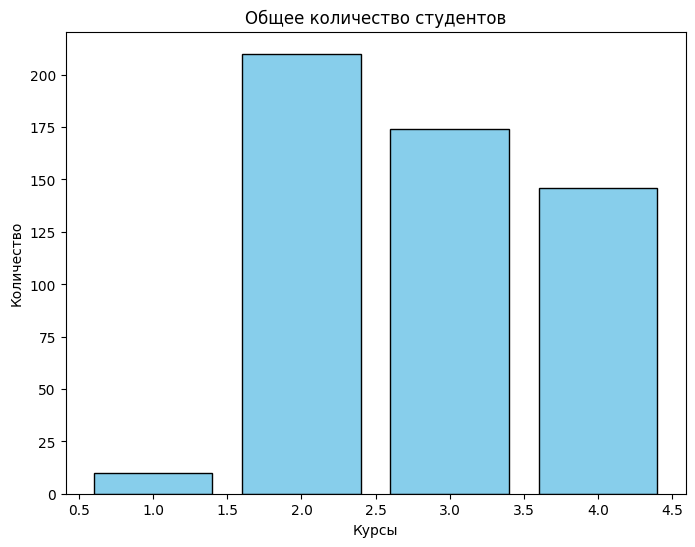

In [100]:
plt.figure(figsize=(8, 6))
plt.bar(asp_courses['course'], asp_courses['count'], color='skyblue', edgecolor='black')

# добавляем заголовок и подписи к осям
plt.title('Общее количество студентов')
plt.xlabel('Курсы')
plt.ylabel('Количество')

plt.show()

In [101]:
asp_unique['country'].value_counts().index

Index(['Российская Федерация', 'Казахстан', 'Узбекистан',
       'Сирийская Арабская Республика', 'Ирак', 'Ангола', 'Молдова', 'Мьянма',
       'Китай', 'Куба', 'Армения', 'Йемен', 'Бурунди',
       'Иран, Исламская Республика', 'Нигерия', 'Уганда', 'Гвинея', 'Зимбабве',
       'Алжир', 'Беларусь', 'Нидерланды', 'Сомали', 'Нигер', 'Иордания',
       'Колумбия', 'Таджикистан', 'Венесуэла Боливарианская Республика',
       'Конго', 'Эфиопия', 'Эквадор', 'Вьетнам', 'Кения', 'Мали',
       'Кот Д'ивуар'],
      dtype='object', name='country')

In [102]:
country_list = asp_unique['country'].value_counts().index[:7]

In [103]:
country_list

Index(['Российская Федерация', 'Казахстан', 'Узбекистан',
       'Сирийская Арабская Республика', 'Ирак', 'Ангола', 'Молдова'],
      dtype='object', name='country')

In [104]:
asp_unique['country_check'] = asp_unique['country'].apply(lambda x: x if x in country_list else 'Другие страны') 

In [105]:
countries = asp_unique['country_check'].value_counts()

In [106]:
countries

country_check
Российская Федерация             452
Другие страны                     41
Казахстан                         13
Узбекистан                        12
Сирийская Арабская Республика      7
Ирак                               6
Ангола                             5
Молдова                            4
Name: count, dtype: int64

In [107]:
countries_percentage = countries/countries.sum()*100

### по странам

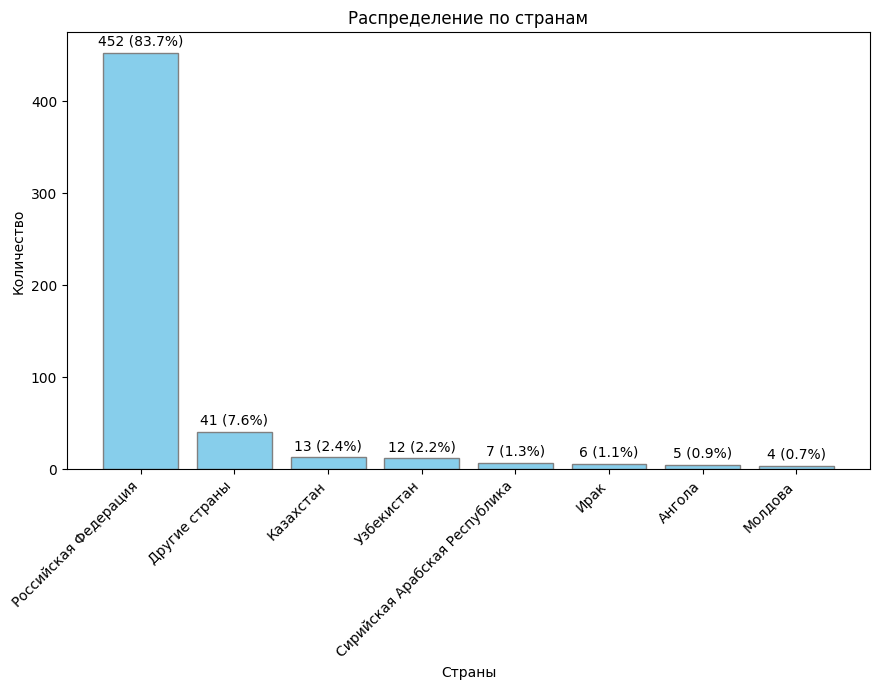

In [108]:
plt.figure(figsize=(9, 7))

# создаем гистограмму
plt.bar(countries.index, countries, color='skyblue', edgecolor='gray')

# добавляем метки для каждого столбца с указанием количества и процента
for index, (count, percent) in enumerate(zip(countries, countries_percentage)):
    plt.text(index, count + max(countries) * 0.01, f'{count} ({percent:.1f}%)', 
             ha='center', va='bottom', fontsize=10, color='black')

# добавляем подписи к осям и заголовок
plt.xlabel("Страны")
plt.ylabel("Количество")
plt.title("Распределение по странам")

plt.xticks(rotation=45, ha='right')  # поворачиваем метки стран для удобства чтения
plt.tight_layout()  # корректируем расположение элементов для избежания наложений
plt.show()

In [109]:
asp_unique['country'].value_counts()

country
Российская Федерация                   452
Казахстан                               13
Узбекистан                              12
Сирийская Арабская Республика            7
Ирак                                     6
Ангола                                   5
Молдова                                  4
Мьянма                                   3
Китай                                    3
Куба                                     3
Армения                                  2
Йемен                                    2
Бурунди                                  2
Иран, Исламская Республика               2
Нигерия                                  2
Уганда                                   2
Гвинея                                   2
Зимбабве                                 2
Алжир                                    1
Беларусь                                 1
Нидерланды                               1
Сомали                                   1
Нигер                                    1
Иор

### общая круговая диаграмма с оценками 

In [113]:
# считаем количество оценок и процент
marks_counts = asp['marks'].value_counts()
marks_percentages = marks_counts / marks_counts.sum() * 100


In [114]:
marks_counts

marks
4    2512
5    2042
2     428
3      69
Name: count, dtype: int64

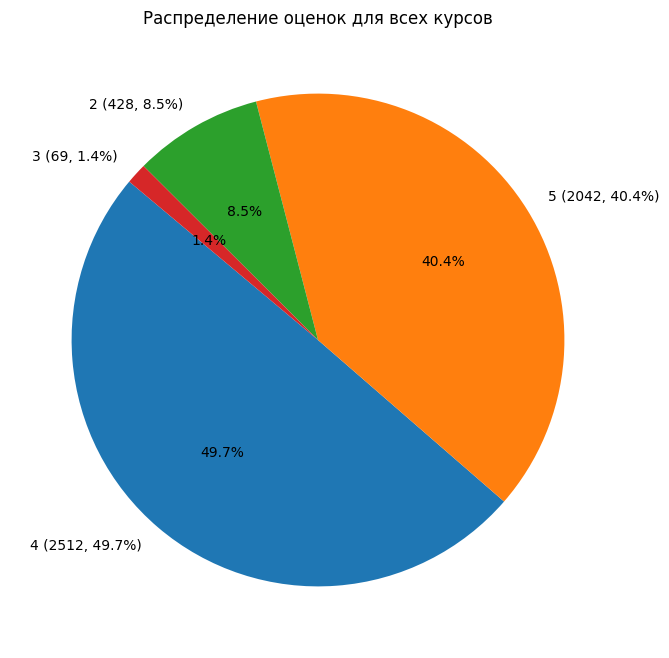

In [116]:

# строим круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(marks_counts, labels=[f'{mark} ({count}, {percent:.1f}%)'
                              for mark, count, percent in zip(marks_counts.index, marks_counts, marks_percentages)],
        autopct='%1.1f%%', startangle=140)
plt.title("Распределение оценок для всех курсов")
plt.show()

In [128]:
asp['marks'].value_counts()

marks
4    2512
5    2042
2     428
3      69
Name: count, dtype: int64

### график успеваемости по предметам 

In [129]:
course_performance = asp.groupby('subject')['marks'].mean().sort_values(ascending = False)

In [131]:
course_performance.tail()

subject
Технологии научных исследований                                                           2.0
Физико-химические и технологические основы получения материалов с заданными свойствами    2.0
Физические процессы в конденсированных средах                                             2.0
Физические свойства твердых тел                                                           2.0
Экспериментальные методы физического материаловедения                                     2.0
Name: marks, dtype: float64

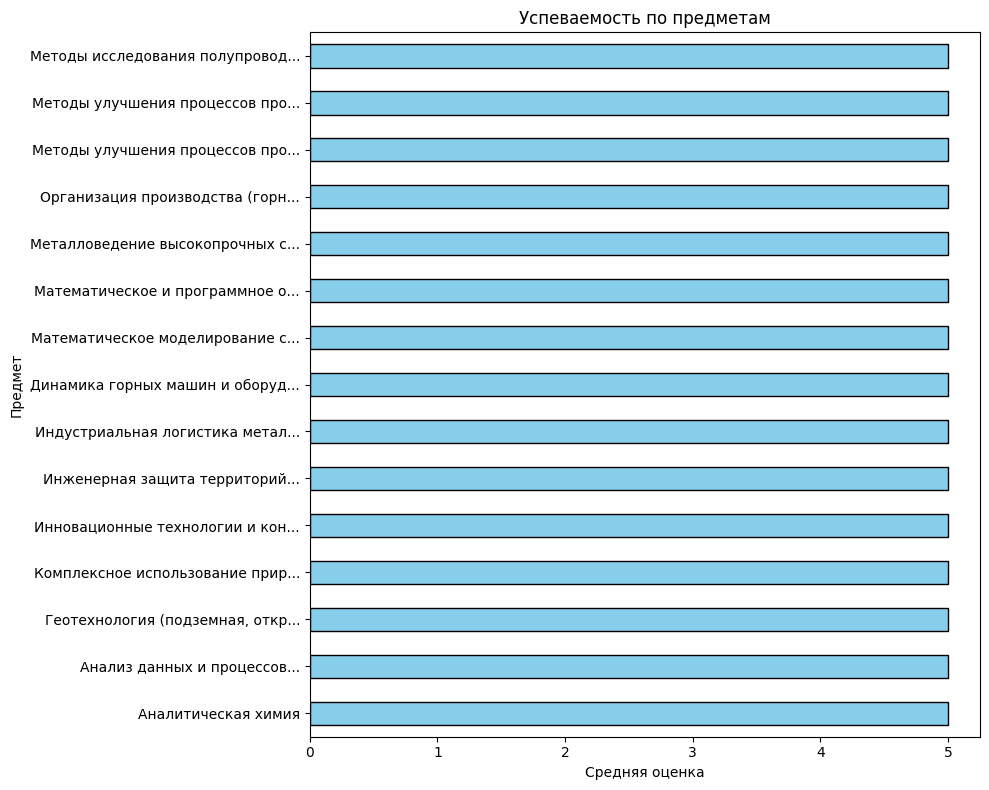

In [132]:
# группируем данные по столбцу subject и считаем среднюю оценку
course_performance = asp.groupby('subject')['marks'].mean().sort_values(ascending = False).head(15)

# сокращаем длину названий предметов
course_performance.index = [f"{subject[:30]}..." if len(subject) > 20 else subject for subject in course_performance.index]

# строим столбчатый график успеваемости по предметам
plt.figure(figsize=(10, 8))  # увеличиваем высоту графика для лучшего отображения длинных названий
course_performance.plot(kind='barh', color='skyblue', edgecolor='black')  # barh для горизонтального графика

# добавляем заголовок и подписи к осям
plt.title('Успеваемость по предметам')
plt.xlabel('Средняя оценка')
plt.ylabel('Предмет')

# уменьшаем интервалы между надписями
plt.tight_layout()

# отображаем график
plt.show()

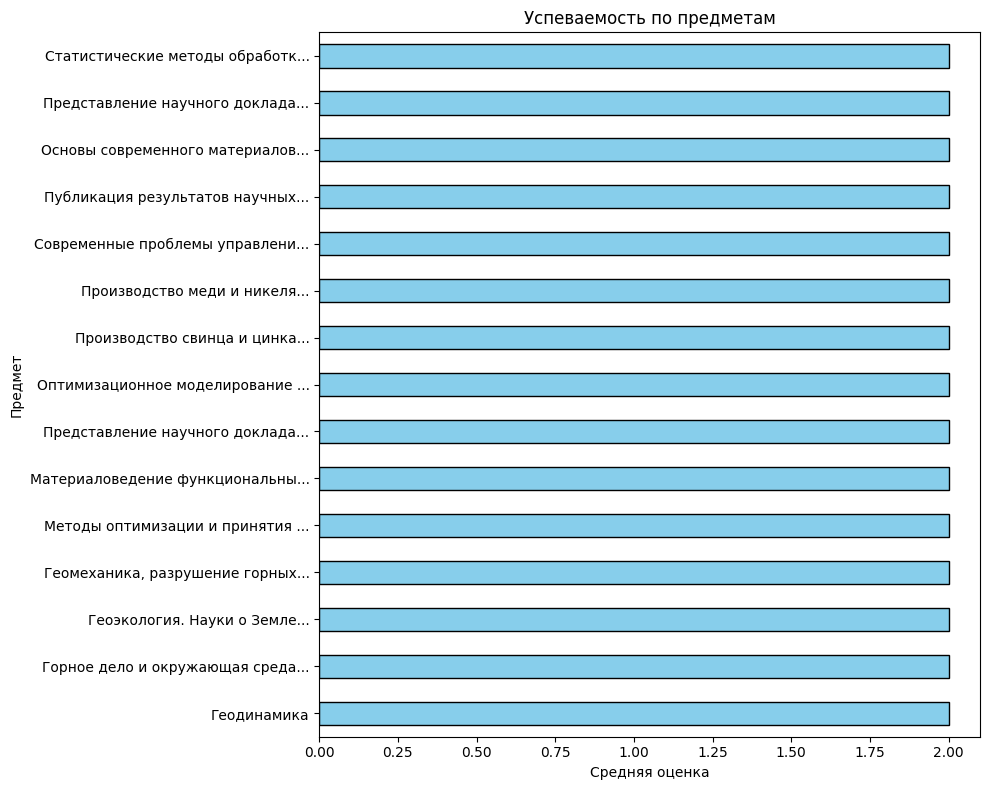

In [135]:
# группируем данные по столбцу subject и считаем среднюю оценку
course_performance = asp.groupby('subject')['marks'].mean().sort_values(ascending=True).head(15)

# сокращаем длину названий предметов
course_performance.index = [f"{subject[:30]}..." if len(subject) > 20 else subject for subject in course_performance.index]

# строим столбчатый график успеваемости по предметам
plt.figure(figsize=(10, 8))  # увеличиваем высоту графика для лучшего отображения длинных названий
course_performance.plot(kind='barh', color='skyblue', edgecolor='black')  # barh для горизонтального графика

# добавляем заголовок и подписи к осям
plt.title('Успеваемость по предметам')
plt.xlabel('Средняя оценка')
plt.ylabel('Предмет')

# уменьшаем интервалы между надписями
plt.tight_layout()

# отображаем график
plt.show()

### график успеваемости по институтам

In [136]:
asp.head(1)

,ld_number,institue,faculty,specialization,course,subject,Оценка (без пересдач),marks,teacher,date,birthday,country
0,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,История и философия науки,Отлично,5,Карулина Татьяна Борисовна,2022 - 2023I полугодие,11.05.1981,Ирак


In [137]:
insititue_performance = asp4.groupby('institue')['marks'].mean()

In [138]:
insititue_performance

institue
Горный институт                                           4.151460
Институт базового образования                             4.142857
Институт информационных технологий и компьютерных наук    4.392523
Институт новых материалов и нанотехнологий                4.379859
Институт физики и квантовой инженерии                     4.122449
Институт экотехнологий и инжиниринга                      4.321384
Name: marks, dtype: float64

<Figure size 640x480 with 0 Axes>

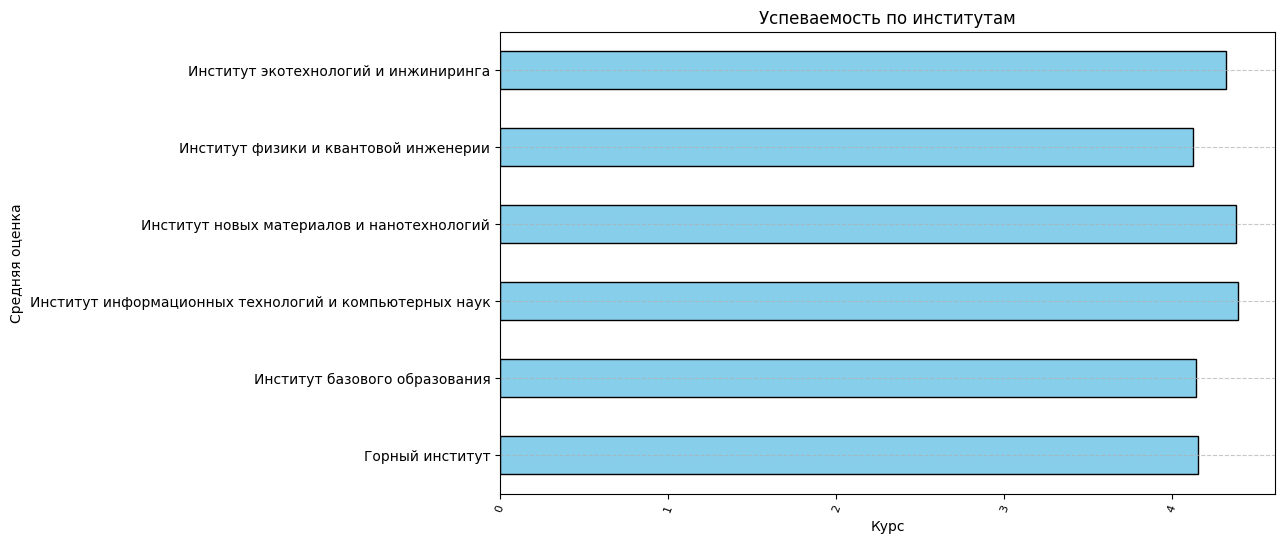

In [139]:
plt.subplots_adjust(bottom=0.11)
plt.figure(figsize=(10, 6))
insititue_performance.plot(kind='barh',color = 'skyblue', edgecolor='black')
plt.title('Успеваемость по институтам')
plt.xlabel('Курс')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=70,fontsize= 8)
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()

In [140]:
### график успеваемости по странам

In [142]:
asp4.head(1)


,ld_number,institue,faculty,specialization,course,subject,Оценка (без пересдач),marks,teacher,date,birthday,country
8,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,Физико-химия наноматериалов,4,История и философия науки,Отлично,5,Челышев Павел Валентинович,2021 - 2022I полугодие,25.06.1996,Узбекистан


In [143]:
country_performance = asp.groupby('country')['marks'].mean()
country_performance


country
Алжир                                  4.000000
Ангола                                 4.075000
Армения                                4.321429
Беларусь                               3.714286
Бурунди                                4.500000
Венесуэла Боливарианская Республика    3.666667
Вьетнам                                4.500000
Гвинея                                 4.500000
Зимбабве                               4.428571
Иордания                               4.384615
Ирак                                   4.204082
Иран, Исламская Республика             4.333333
Йемен                                  4.166667
Казахстан                              4.112782
Кения                                  4.538462
Китай                                  4.185185
Колумбия                               4.500000
Конго                                  2.200000
Кот Д'ивуар                            4.500000
Куба                                   4.333333
Мали                            

<Figure size 640x480 with 0 Axes>

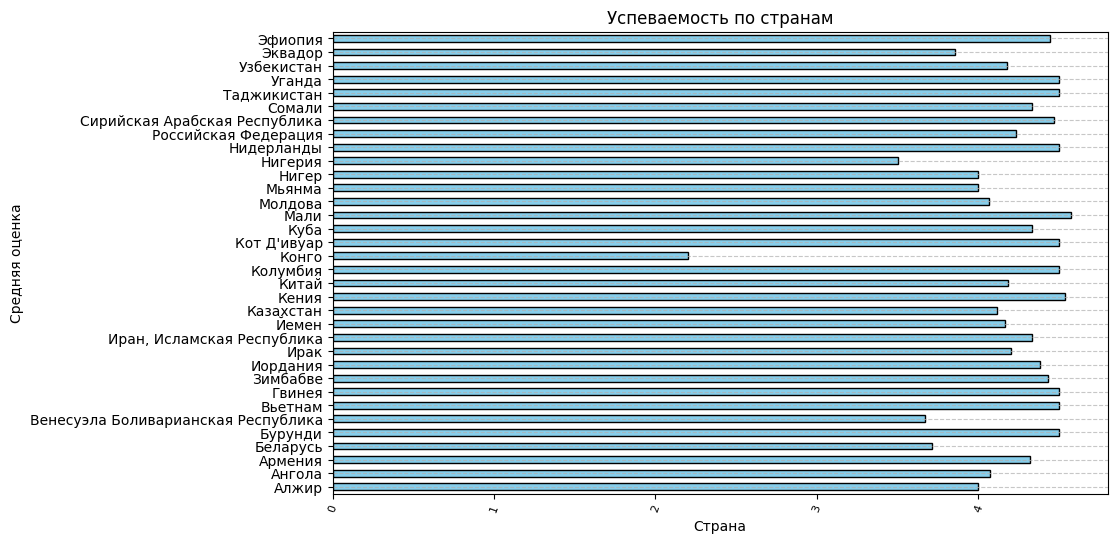

In [144]:
plt.subplots_adjust(bottom=0.11)
plt.figure(figsize=(10, 6))
country_performance.plot(kind='barh',color = 'skyblue', edgecolor='black')
plt.title('Успеваемость по странам')
plt.xlabel('Страна')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=70,fontsize= 8)
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()

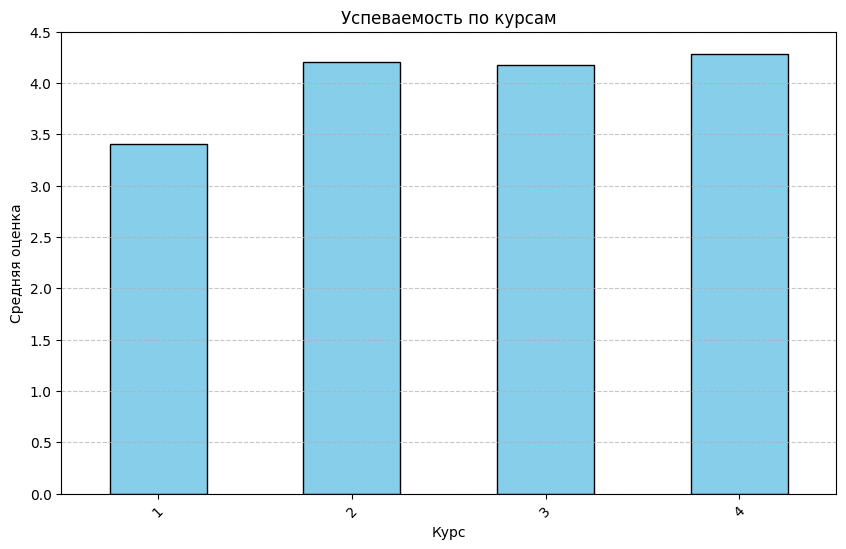

In [145]:
### график успеваемости по курсам 
asp.head(1)
# предположим, что DataFrame называется asp
# группируем данные по столбцу course и считаем среднюю оценку
course_performance = asp.groupby('course')['marks'].mean()

asp['course'].value_counts()
course_performance

# строим столбчатый график успеваемости по курсам
plt.figure(figsize=(10, 6))
course_performance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Успеваемость по курсам')
plt.xlabel('Курс')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [141]:
asp_joke.head()

,№п/п,ФИО,Номер ЛД,Подразделение,Специальность/направление,Специализация/профиль,Курс по порядку,Состояние,Дисциплина,Оценка (без пересдач),Оценка (успеваемость),Полугодие,Преподаватель,Учебный год
3,4,Аббас Майтхам Худайр Аббас,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,Аспирант,Обеспечение безопасного применения электроэнергии на предприятиях минерально-сырьевого комплекса,NaN,NaN,II полугодие,NaN,2024 - 2025
4,5,Аббас Майтхам Худайр Аббас,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,Аспирант,Электротехнические комплексы и системы,NaN,NaN,I полугодие,NaN,2025 - 2026
7,8,Аббас Майтхам Худайр Аббас,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,Аспирант,Подготовка к защите диссертации на соискание ученой степени кандидата наук,NaN,NaN,II полугодие,NaN,2025 - 2026
8,9,Аббас Майтхам Худайр Аббас,2200674,Горный институт,Электротехнические комплексы и системы,Электротехнические комплексы и системы,3,Аспирант,"Научная деятельность, направленная на подготовку диссертации на соискание ученой степени кандидата наук к защите",NaN,NaN,II полугодие,NaN,2024 - 2025
13,14,Абдукодиров Абдулла Абдумалик Угли,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,Физико-химия наноматериалов,4,Аспирант,Государственный экзамен,NaN,NaN,II полугодие,NaN,2024 - 2025


In [144]:
asp_joke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6498 entries, 3 to 12179
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   №п/п                       6498 non-null   int64 
 1   ФИО                        6498 non-null   object
 2   Номер ЛД                   6498 non-null   int64 
 3   Подразделение              6498 non-null   object
 4   Специальность/направление  6498 non-null   object
 5   Специализация/профиль      5894 non-null   object
 6   Курс по порядку            6498 non-null   int64 
 7   Состояние                  6498 non-null   object
 8   Дисциплина                 6498 non-null   object
 9   Оценка (без пересдач)      0 non-null      object
 10  Оценка (успеваемость)      20 non-null     object
 11  Полугодие                  6498 non-null   object
 12  Преподаватель              20 non-null     object
 13  Учебный год                6498 non-null   object
dtypes: int64(3),